## Dealing with missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Deleting

In [2]:
data = pd.read_csv('cdc_missing_values.csv')

In [3]:
# Count missing values in each column
data.isnull().sum()

genhlth     1
exerany     0
hlthplan    2
smoke100    0
height      1
weight      1
wtdesire    0
age         2
gender      1
dtype: int64

In [4]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genhlth   19999 non-null  object 
 1   exerany   20000 non-null  int64  
 2   hlthplan  19998 non-null  float64
 3   smoke100  20000 non-null  int64  
 4   height    19999 non-null  float64
 5   weight    19999 non-null  float64
 6   wtdesire  20000 non-null  int64  
 7   age       19998 non-null  float64
 8   gender    19999 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [5]:
# removing rows with missing data
data.dropna(axis=0)
data.shape

(20000, 9)

In [6]:
data_r = data.dropna(axis=0)
data_r.shape

(19993, 9)

In [7]:
data.dropna(axis=0,inplace=True)
data.shape

(19993, 9)

#### To remove columns with missing data set axis = 1

In [8]:
data.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,19993.000000,19993.000000,19993.000000,19993.000000,19993.000000,19993.000000,19993.000000
mean,0.745711,0.873906,0.472065,67.179213,169.684840,155.094733,45.065473
std,0.435472,0.331964,0.499232,4.153486,40.087493,32.017815,17.195082
min,0.000000,0.000000,0.000000,0.000000,68.000000,68.000000,0.000000
25%,0.000000,1.000000,0.000000,64.000000,140.000000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.000000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.000000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.000000,680.000000,99.000000


### Minimum height and minimum age are 0. These may be indication for missing values.

In [9]:
# substitute the zero values in columns height and age with np.nan
data[['height','age']] = data[['height','age']].replace(0,np.nan)

In [10]:
# Count missing values in each column
data.isnull().sum()

genhlth     0
exerany     0
hlthplan    0
smoke100    0
height      1
weight      0
wtdesire    0
age         1
gender      0
dtype: int64

In [11]:
data.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,19993.000000,19993.000000,19993.000000,19992.000000,19993.000000,19993.000000,19992.000000
mean,0.745711,0.873906,0.472065,67.182573,169.684840,155.094733,45.067727
std,0.435472,0.331964,0.499232,4.126323,40.087493,32.017815,17.192557
min,0.000000,0.000000,0.000000,48.000000,68.000000,68.000000,18.000000
25%,0.000000,1.000000,0.000000,64.000000,140.000000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.000000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.000000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.000000,680.000000,99.000000


### Imputation

In [12]:
data = pd.read_csv('cdc_missing_values.csv')

In [13]:
# Fill missing values with median
data['age'].fillna(data['age'].median(), inplace=True) 

In [14]:
# Fill missing values with mode
data['genhlth'].fillna(data['genhlth'].mode()[0], inplace=True) 

#### using scikit-learn library - SimpleImputer

In [15]:
# read the data
data = pd.read_csv('cdc_missing_values.csv')

In [16]:
# substitute the zero values in columns height and age with np.nan
data[['height','age']] = data[['height','age']].replace(0,np.nan)

In [17]:
# define the imputer
# strategies are ['mean', 'median', 'most_frequent', 'constant'] 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# transform the data
transformed_data = imputer.fit_transform(data)
transformed_data

array([['good', 0, 1.0, ..., 175, 77.0, 'm'],
       ['good', 0, 1.0, ..., 115, 33.0, 'f'],
       ['good', 1, 1.0, ..., 105, 49.0, 'f'],
       ...,
       ['poor', 0, 1.0, ..., 150, 57.0, 'f'],
       ['good', 1, 1.0, ..., 165, 81.0, 'f'],
       ['good', 1, 1.0, ..., 165, 83.0, 'm']], dtype=object)

In [18]:
# back to data frame
transformed_data = pd.DataFrame(transformed_data)

In [19]:
transformed_data

,0,1,2,3,4,5,6,7,8
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
...,...,...,...,...,...,...,...,...,...
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f


In [20]:
transformed_data.columns = ['genhlth','exerany','hlthplan','smoke100','height','weight','wtdesire','age','gender']

In [21]:
transformed_data.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


In [22]:
# Count the missing values in the transformed data
transformed_data.isnull().sum()

genhlth     0
exerany     0
hlthplan    0
smoke100    0
height      0
weight      0
wtdesire    0
age         0
gender      0
dtype: int64

#### using scikit-learn library - KNNImputer

For a data point with missing values, KNNImputer identifies the K closest points (nearest neighbours) under a chosen distance metric (default: Euclidean). The number of nearest neighbours is specified by the n_neighbors parameter (default: 5).

The missing value is set to the mean of the values of that column for the K nearest neighbours, weighted uniformly by default.

In [23]:
# read the data
data = pd.read_csv('cdc_missing_values.csv')

In [24]:
# select some numeric columns
data_num = data[['height','weight','age']]

In [25]:
# define the imputer
imputer = KNNImputer(n_neighbors=3)

In [26]:
# transform the data set
transformed_data_num = imputer.fit_transform(data_num)

In [27]:
transformed_data_num = pd.DataFrame(transformed_data_num)

In [28]:
transformed_data_num.columns = ['height','weight','age']

In [29]:
# Count the missing values in the transformed data
transformed_data_num.isnull().sum()

height    0
weight    0
age       0
dtype: int64

#### using scikit-learn library - IterativeImputer

IterativeImputer models each column with missing values as a function of other columns, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a column is designated as output y and the other columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each column in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

Note: Because IterativeImputer is still experimental, it has to be enabled explicitly.

In [30]:
# read the data
data = pd.read_csv('cdc_missing_values.csv')

In [31]:
# select some numeric columns
data_num = data[['height','weight','age']]

In [32]:
# define the imputer
imputer = IterativeImputer(random_state=0)

In [33]:
# transform the data set
transformed_data_num = imputer.fit_transform(data_num)

In [34]:
transformed_data_num = pd.DataFrame(transformed_data_num)

In [35]:
transformed_data_num.columns = ['height','weight','age']

In [36]:
# Count the missing values in the transformed data
transformed_data_num.isnull().sum()

height    0
weight    0
age       0
dtype: int64

## Dealing with outliers

### Box and whiskers plot

In [37]:
data = pd.read_csv('cdc_outliers.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

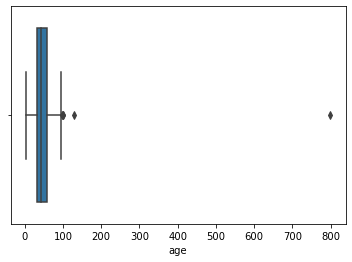

In [38]:
# detection using box and whiskers plot
sns.boxplot(data['age'])

In [39]:
data.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.105850
std,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,18.012942
min,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,3.000000
25%,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.00000,680.000000,799.000000


### Why the low outliers in this data set cannot be seen in the box and whiskers plot?

In [40]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 =',Q1,'Q3 =',Q3,'IQR =',IQR)

Q1 = 31.0 Q3 = 57.0 IQR = 26.0


In [41]:
data_clean_IQR = data[(data['age'] >= (Q1 - 1.5 * IQR)) & (data['age'] <= (Q3 + 1.5 * IQR))]

### Z-scores

In [42]:
# Keep values within 3 standard deviations from the mean
data_clean_Z = data[(stats.zscore(data['age']) < 3)] 

## Removing duplicates

In [43]:
 # Check for duplicate rows
data.duplicated().sum()  

130

In [44]:
# Remove duplicate rows
data = data.drop_duplicates()  

In [45]:
data.shape

(19870, 9)

## Standardising text data

In [46]:
data['genhlth'] = data['genhlth'].str.lower().str.strip()

## Converting date formats

In [47]:
#### data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')